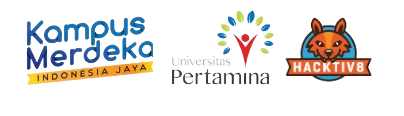

# Final Project 3: Classification - Ensemble Model

Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Meet our Member:** 
1. Andreas Dimas Christanto (PYTN-KS-08-017)
2. Elizabeth Bella Ruth Septiana (PYTN-KS-08-016)

# Overview

<p style='text-align: justify;'>
   Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan himpunan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

<p style='text-align: justify;'>
    Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, ketidakaktifan fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

<p style='text-align: justify;'>
    Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.

## Data Description 

<p style='text-align: justify;'>
    Pada dataset yang digunakan pada heart failure prediction yang didapatkan dari Kaggle berisikan variasi atribut sebanyak 13 atribut dengan 299 baris. Diperlukan sebuah aplikasi yang dirancang untuk melihat hasil prediksi keselamatan pasien dan mendekteksi sejak dini dari penyakit jantung. Berikut ini 13 atribut yang digunakan untuk pembuatan project ini. 

- **Age**: Umur pasien 
- **Anaemia**: Tingkat haemoglobin pada pasien 
- **Creatine_phosphokinase**: Tingkat enzim CPK di dalam darah (mcg/L) 
- **Diabetes**: Apabila pasien memiliki riwayat diabetes (boolean) 
- **Ejection_fraction**: Persentase darah yang meninggalkan jantung dalam persentase di setiap kontraksi jantung. 
- **High_blood_pressure**: Apabila pasien memiliki riwayat hipertensi 
- **Platelets**: Jumlah platelet di dalam darah (Kiloplatelets/ ML) 
- **Serum_creatinine**: Tingkat serum creatinine di dalam darah (mg/dL) 
- **Serum_sodium**: Tingkat serum sodium di dalam darah (mEq/L) 
- **Sex**: Jenis kelamin pasien 
- **Smoking**: Apabila pasien merupakan perokok atau tidak 
- **Time**: Waktu Follow-up (hari) 
- **DEATH_EVENT**: Apakah pasien sudah meninggal saat waktu follow-up

## Objective 

Pada kasus ini, tujuan atau objective yang ingin dicapai antara lain sebagai berikut: 
- Mengetahui persentase angka kematian yang disebabkan oleh penyakit jantung. 
- Mengetahui nilai akurasi pada model pengujian yang digunakan untuk memprediksi keselamatan pasien dari penyakit jantung. 
- Mengetahui model yang baik dengan best configuration untuk memprediksi keselamatan pasien dari penyakit jantung. 


# Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,accuracy_score,recall_score, f1_score,precision_score

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import pickle

# Style Text
bold = '\033[1m'
normal = '\033[0m'

# Data Loading 

In [2]:
##Memanggil data final project 3 yang telah diberikan
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

#Menampilkan 5 data teratas 
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Menampilkan 5 data terbawah 
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
#Melihat tipe data secara detail dengan fungsi info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#Melihat jumlah baris pada data
len(data)
print("Dataset ini memiliki jumlah baris sebanyak",len(data))

Dataset ini memiliki jumlah baris sebanyak 299


In [6]:
#Melihat jumlah kolom pada data
len(data.columns)
print("Dataset ini memiliki jumlah kolom sebanyak",len(data.columns))

Dataset ini memiliki jumlah kolom sebanyak 13


In [7]:
#Menghitung nilai unique pada data
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
nunique_col = data.nunique().sort_values(ascending=False)
nunique_col = pd.DataFrame(nunique_col, columns = ["jumlah"])
nunique_col

,jumlah
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


In [9]:
for col in data.columns:
    print(col,': ')
    print(data[col].value_counts())
    print("  ")
    print("  ")

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
  
  
anaemia : 
0    170
1    129
Name: anaemia, dtype: int64
  
  
creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
  
  
diabetes : 
0    174
1    125
Name: diabetes, dtype: int64
  
  
ejection_fr

In [10]:
#Mengecek missing value 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Kesimpulan**: 
- Berdasarkan pengecekan missing value yang dilakukan pada dataset ini tidak ditemukan missing value pada masing-masing atribut

# Data Cleaning 

In [11]:
#Mengecek data duplikat 
data.duplicated().sum()

0

**Kesimpulan**: berdasarkan hasil pengecekan, tidak terdapat data duplikat

In [12]:
##Membuat crosstab pada pandas dengan index age dan columns name
pd.crosstab(data.age, data.DEATH_EVENT)

DEATH_EVENT,0,1
age,,
40.000,7,0
41.000,1,0
42.000,6,1
43.000,1,0
44.000,2,0
45.000,13,6
46.000,2,1
47.000,1,0
48.000,0,2


**Keterangan**: Berdasarkan pada crosstab di atas dapat dilihat bahwa dari terdapat beberapa parameter yang digunakan untuk pengerjaan project ini antara lain:

- Age
- Creatinine_phosphokinase
- Ejection_fraction
- Serum_Creatinine
- Anaemia 
- Sex
- Smoking 
- Diabetes 
- Time 
- Platelets

In [13]:
#Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru
col_group = [
    "age", 
    "anaemia", 
    "creatinine_phosphokinase", 
    "diabetes",
    "ejection_fraction",
    "high_blood_pressure", 
    "platelets", 
    "serum_creatinine", 
    "serum_sodium", 
    "sex",
    "smoking",
    "time", 
    "DEATH_EVENT"
]

In [14]:
data_group = data[col_group]
data_group.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Rename Column Name 

In [15]:
data_group.rename(columns={ 'age': 'usia','creatinine_phosphokinase': 'creatinin_fosfokinase', 'ejection_fraction': 'fraksi_ejeksi', 'high_blood_pressure': 'tekanan_darah_tinggi', 'serum_creatinine': 'kreatinin_serum', 'serum_sodium': 'sodium_serum', 'sex': 'jenis kelamin','DEATH_EVENT': 'Kematian'}, inplace=True)
data_group.columns

Index(['usia', 'anaemia', 'creatinin_fosfokinase', 'diabetes', 'fraksi_ejeksi',
       'tekanan_darah_tinggi', 'platelets', 'kreatinin_serum', 'sodium_serum',
       'jenis kelamin', 'smoking', 'time', 'Kematian'],
      dtype='object')

In [16]:
data_group.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis kelamin,smoking,time,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploration Data and Analysis (EDA)

In [17]:
data_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   usia                   299 non-null    float64
 1   anaemia                299 non-null    int64  
 2   creatinin_fosfokinase  299 non-null    int64  
 3   diabetes               299 non-null    int64  
 4   fraksi_ejeksi          299 non-null    int64  
 5   tekanan_darah_tinggi   299 non-null    int64  
 6   platelets              299 non-null    float64
 7   kreatinin_serum        299 non-null    float64
 8   sodium_serum           299 non-null    int64  
 9   jenis kelamin          299 non-null    int64  
 10  smoking                299 non-null    int64  
 11  time                   299 non-null    int64  
 12  Kematian               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Kesimpulan**: 
- Terdapat 13 atribut dengan tipe data yaitu terdiri dari 2 jenis antara lain float dan integer. 

In [18]:
data_group.shape

(299, 13)

**Kesimpulan:**
- Terdapat 299 rekam medis pasien gagal jantung dengan 13 atribut, dengan DEATH_EVENT sebagai variable dependen. 

In [19]:
#Melihat statistik data numerik seperti mean, count, standard deviation, maximum , minimum, dan nilai quartile
data_group.describe()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis kelamin,smoking,time,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Kesimpulan**:
Berdasarkan hasil data deskriptif maka dapat ditarik kesimpulan sebagai berikut: 

**Parameter Usia** 
- Rata-rata usia pasien penderita **penyakit jantung** berkisar 60 tahun 
- Usia minimal pasien penderita **penyakit jantung** yaitu 40 tahun 
- Usia maksimal pasien penderita **penyakit jantung** yaitu 95 tahun 

**Parameter Anaemia** 
- Rata-rata nilai pada index anaemia pada pasien penderita **penyakit jantung** berkisar 0.431438
- Nilai anaemia terendah pada pasien  penderita **penyakit jantung** yaitu 0 
- Nilai anaemia tertinggi pada pasien penderita **penyakit jantung** yaitu 1

**Parameter Creatinin Phosphokinase** 
- Rata-rata nilai pada index Creatinin Fosfokinase pada pasien penderita **penyakit jantung** berkisar 581.8394
- Nilai minimal Creatinin Fosfokinase  pada pasien penderita **penyakit jantung** yaitu 23.00 
- Nilai maksimal Creatinin Fosfokinase  pada pasien penderita **penyakit jantung** yaitu 7861

**Parameter Diabetes** 
- Rata-rata nilai pada index Diabetes pada pasien penderita **penyakit jantung** berkisar 0.418 
- Nilai minimal Diabetes pada pasien penderita **penyakit jantung** yaitu 0 
- Nilai maksimal Diabetes pada pasien penderita **penyakit jantung** yaitu 1

**Parameter Fraksi Ejeksi**
- Rata-rata fraksi ejeksi pada pasien penderita **penyakit jantung** berkisar 38.083612
- Fraksi ejeksi terendah pada pasien penderita **penyakit jantung** yaitu 14.00 
- Fraksi ejeksi tertinggi pada pada pasien penderita **penyakit jantung** yaitu 80.00 

**Parameter Tekanan Darah Tinggi** 
- Rata-rata tekanan darah tinggi pada pada pasien penderita **penyakit jantung** berkisar 0.351171 
- Nilai tekanan darah tinggi terendah pada pasien penderita **penyakit jantung** yaitu 0 
- Nilai tekanan darah tinggi tertinggi pada pasien penderita **penyakit jantung** yaitu 1

### Visualisasi Data dengan Histogram 

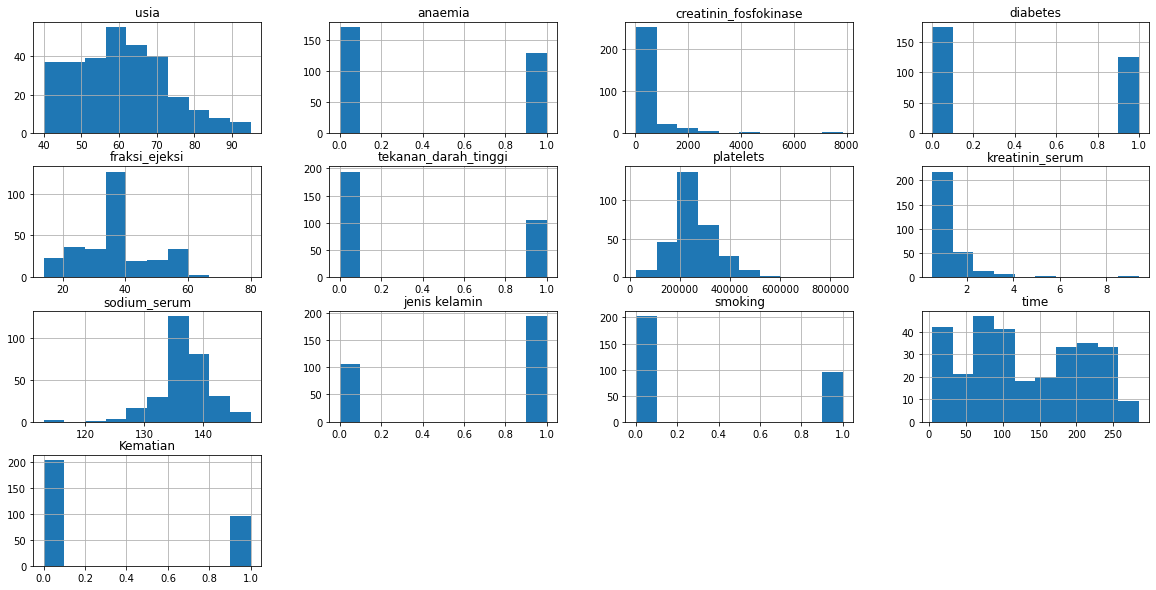

In [20]:
data_group.hist(figsize =(20,10))

#Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

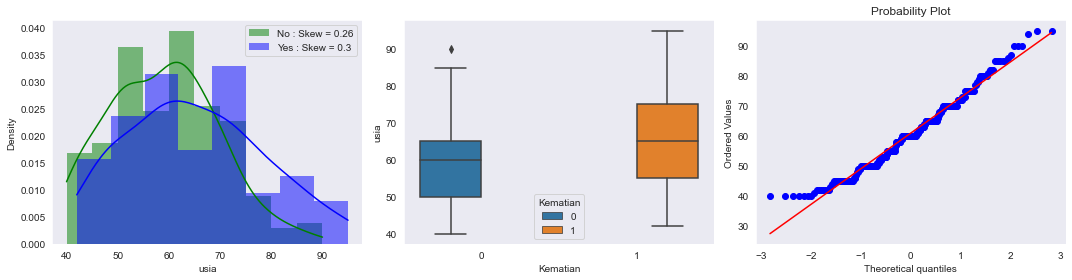

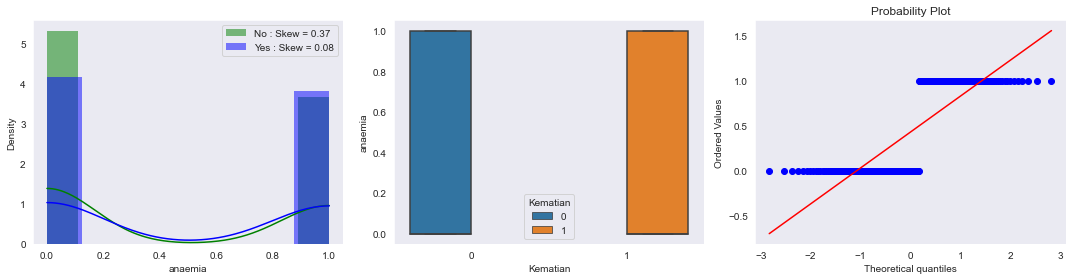

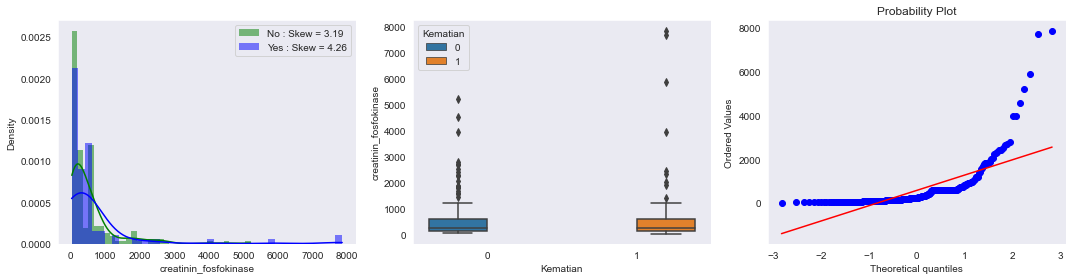

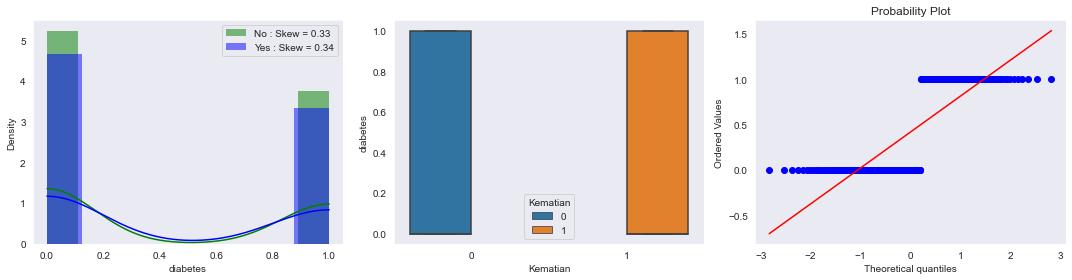

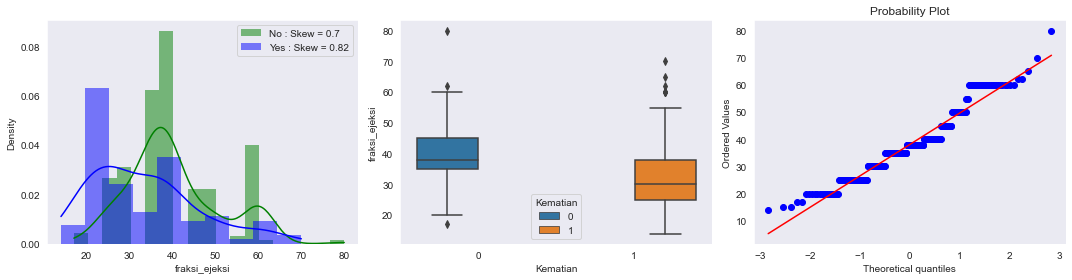

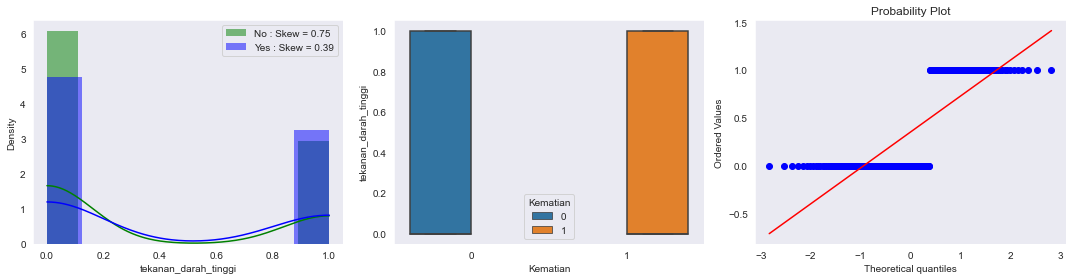

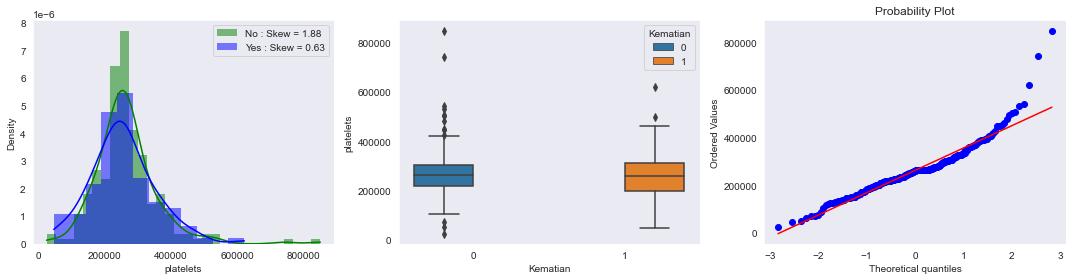

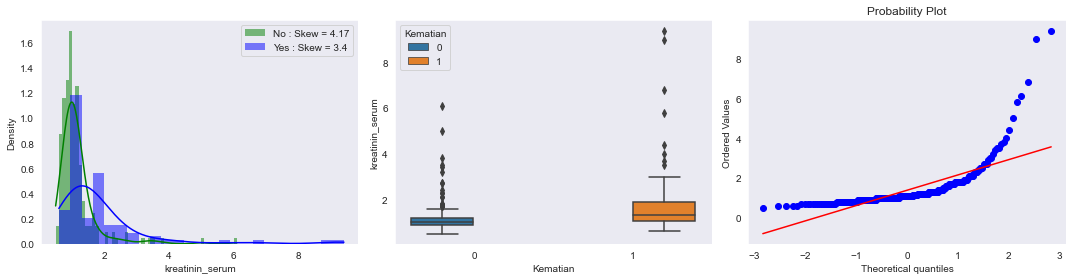

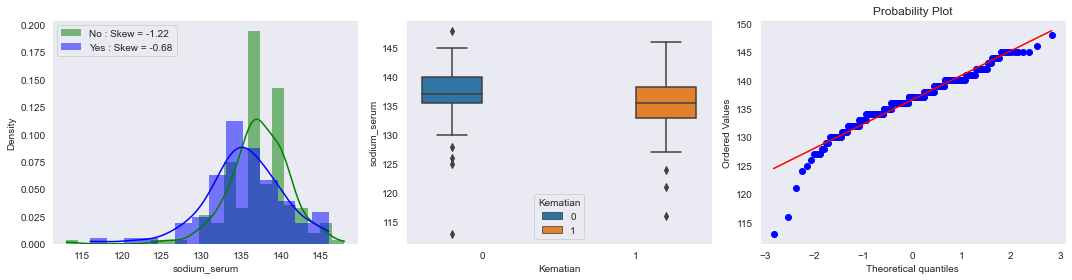

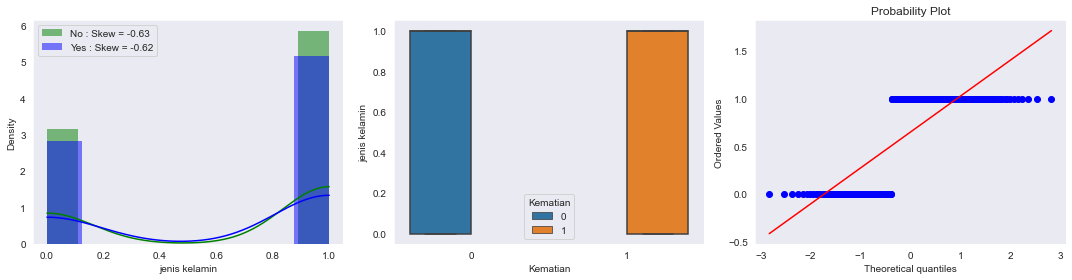

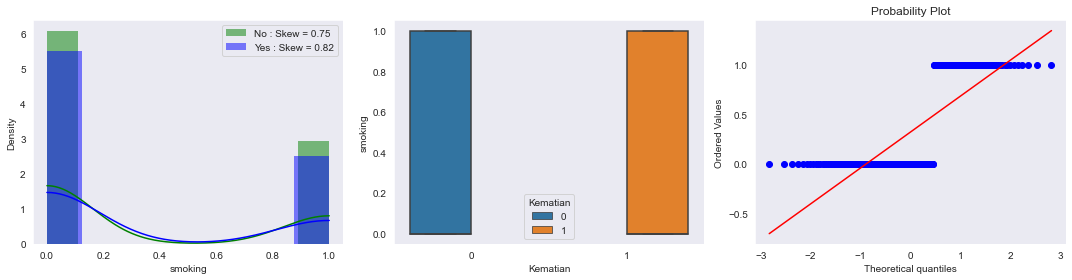

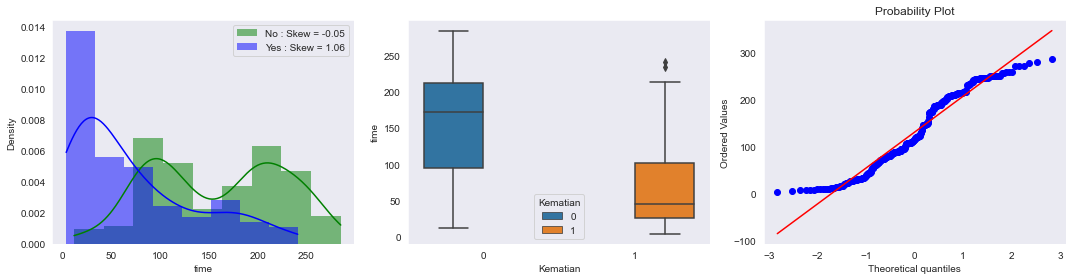

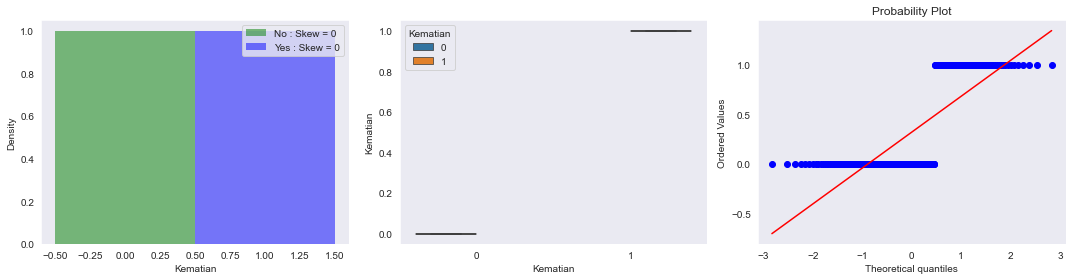

<Figure size 432x288 with 0 Axes>

In [21]:
def visualisasi_distribusi_data(data_data_group, features, targetName='Kematian', targetLabel=['No','Yes']):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_data_group[col][data_data_group[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data_data_group[col][data_data_group[targetName] == 0].skew(), 2)),
            kde=True,
            color='g',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data_data_group[col][data_data_group[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data_data_group[col][data_data_group[targetName] == 1].skew(), 2)),
            kde=True,
            color='b',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_data_group[targetName],
            y = data_data_group[col],
            hue = data_data_group[targetName])
        plt.subplot(133)
        stats.probplot(x=data_data_group[col], plot=plt)
        plt.tight_layout()
        plt.show()
        
visualisasi_distribusi_data(data_group,data_group.columns.values)# Save Plot

# Save Plot
plt.savefig("visualisasi_distribusi.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

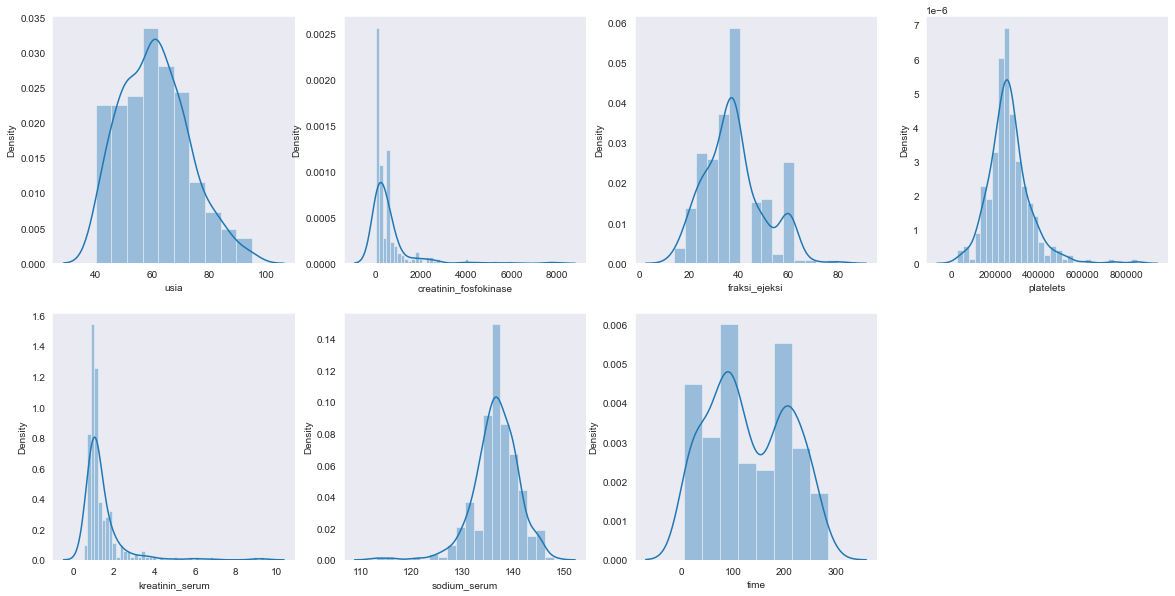

In [22]:
num_col =['usia', 'creatinin_fosfokinase', 'fraksi_ejeksi', 'platelets', 'kreatinin_serum','sodium_serum','time']
        
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.distplot(data_group[i])
    j=j+1

**Kesimpulan:**
- Berdasarkan grafik distribusi diatas, hampir keseluruhan memiliki kemiringan distribusi yang tidak simetris (Skewness). 

### Visualisasi antardata dengan correlation heatmap

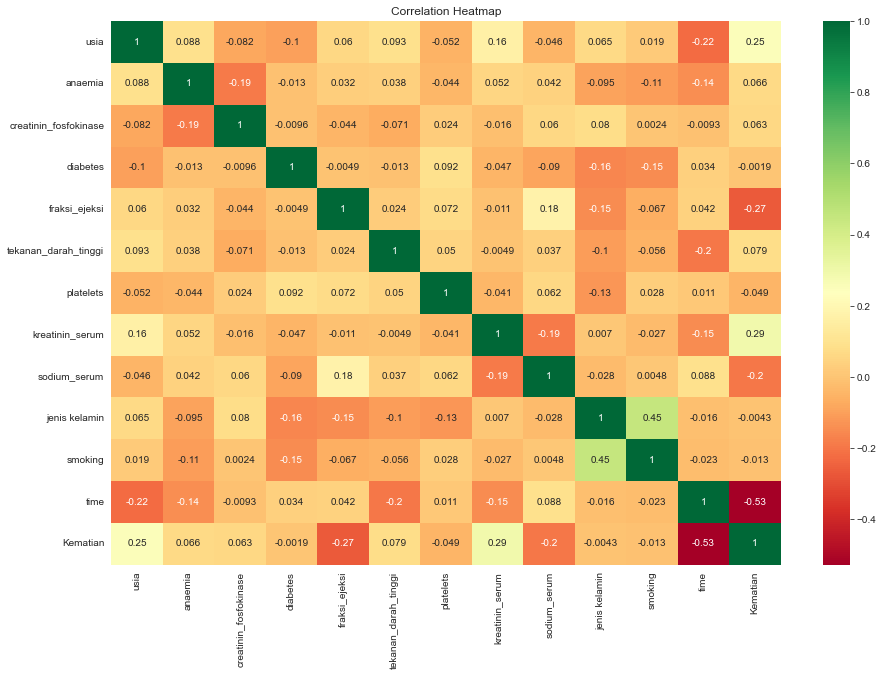

In [23]:
corr = data_group.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap='RdYlGn');
plt.title("Correlation Heatmap")

#Save Plot 
plt.savefig("corr_heatmap.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan**: 
- Berdasarkan matriks korelasi heatmap didapatkan bahwa terdapat parameter yang berkorelasi negatif antara waktu dan kematian. 

### Visualisasi dengan bar chart

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\si

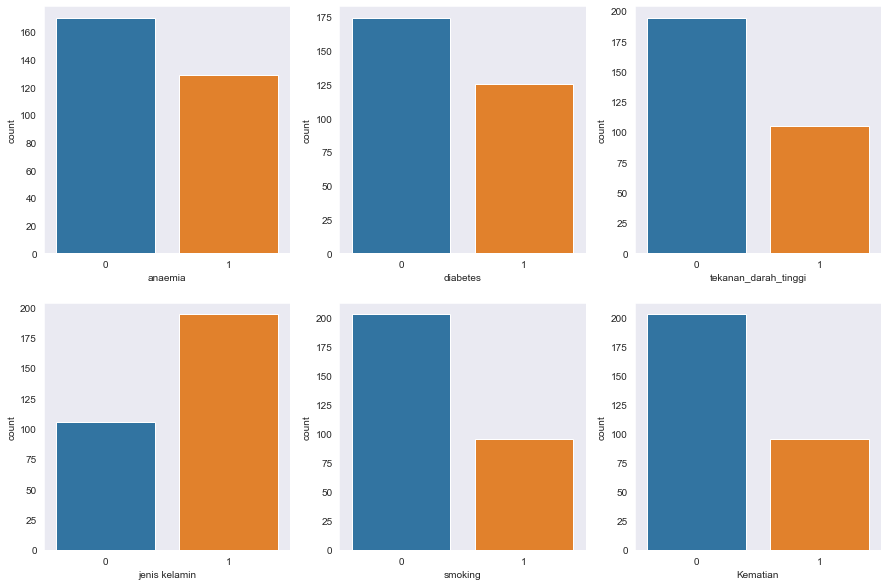

In [24]:
vis_col = [ 'anaemia', 'diabetes','tekanan_darah_tinggi', 'jenis kelamin', 'smoking','Kematian']
fig = plt.figure(figsize = (15,10))
j=1
for i in vis_col:
    plt.subplot(2,3,j)
    sns.countplot(data_group[i])
    j=j+1
    
#Save Plot 
plt.savefig("visualisasi_barchart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:**

Asumsi: 
- Jenis kelamin: **Wanita**:0, **Pria**: 1
- Diabetes: **Tidak**: 0, **Ya**: 1
- Tekanan darah tinggi: **Tidak**: 0, **Ya**: 1
- Anemia: **Tidak**: 0, **Ya**: 1
- Smoking: **Tidak**: 0, **Ya**: 1
- Kematian: **Tidak**: 0, **Ya**: 1

Dapat disimpulkan bahwa pasien penderita gagal jantung yang diilustrasikan pada bar chart adalah sebagai berikut:
- pada kategori jenis kelamin khususnya pria merupakan pasien penderita gagal jantung dengan jumlah lebih besar dibanding wanita. 

### Visualisasi dengan pie chart

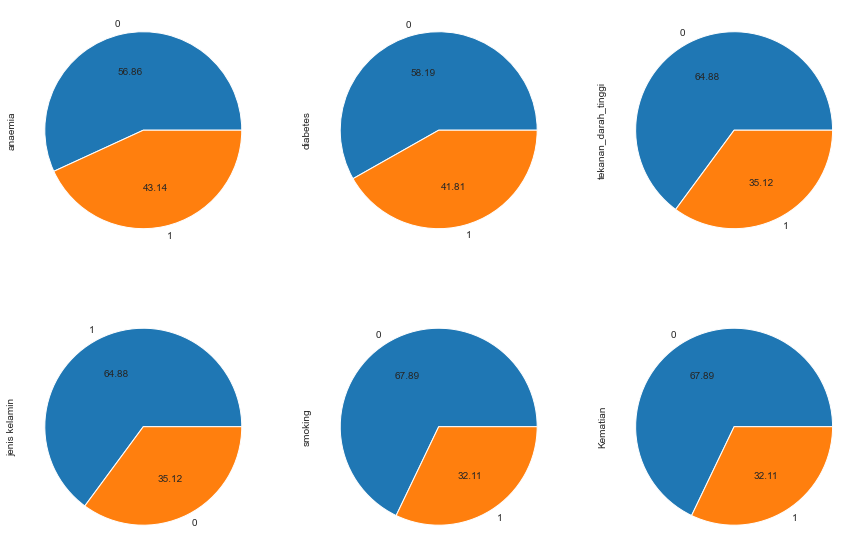

In [25]:
vis_col= [ 'anaemia', 'diabetes','tekanan_darah_tinggi', 'jenis kelamin', 'smoking','Kematian']
fig = plt.figure(figsize = (15,10))
j=1
for i in vis_col:
    plt.subplot(2,3,j)
    data_group[i].value_counts().plot(kind ='pie',autopct = '%.2f')
    j=j+1
    
#Save Plot 
plt.savefig("visualisasi_piechart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:**
Berdasarkan gambar pie chart maka dapat ditarik kesimpulan dengan beberapa asumsi berikut. 
1. Jenis Kelamin - Pria- 64.88 , Wanita- 35.12
2. Diabetes - Tidak = 58.19, Ya = 41.81
3. Anaemia - Tidak = 56.86 , Ya = 43.14
4. Tekanan darah tinggi - Tidak = 64.88, Ya = 35.12
5. Smoking - Tidak = 67.89, Ya = 32.11
6. Kematian - Tidak = 67.89, Ya = 32.11

### Visualisasi Atribut Usia dengan Bar Plot 

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


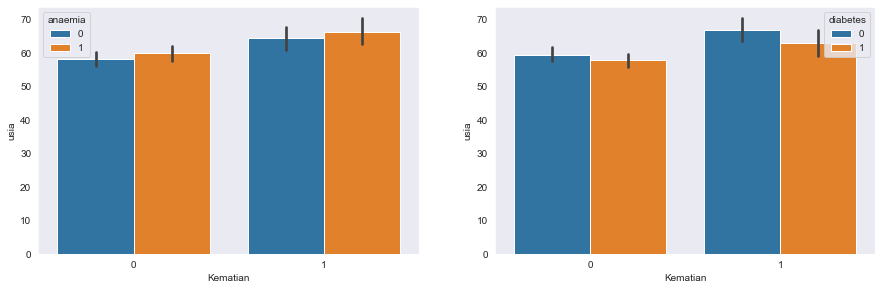

In [26]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data_group['Kematian'], data_group['usia'],hue=data_group['anaemia'])
plt.subplot(2,2,2)
sns.barplot(data_group['Kematian'], data_group['usia'],hue=data_group['diabetes'])

#Save Plot 
plt.savefig("visualisasi_barplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:**
- **Asumsi yang digunakan:**
0 = Tidak 
1 = Ya 

- Berdasarkan hasil bar chart diatas antara anemia vs kematian dan usia vs kematian dapat disimpulkan bahwa seseorang dengan penderita anemia dan diabetes memiliki tingkat resiko kematian yang tinggi. 

### Visualisasi tekanan darah tinggi dengan bar plot

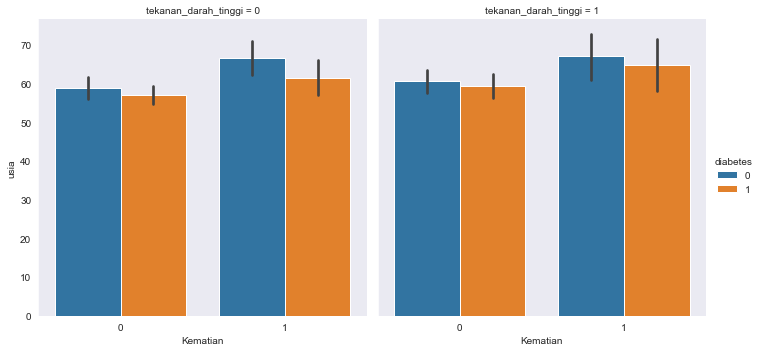

In [27]:
sns.catplot(x = 'Kematian', y= 'usia', data =data_group, kind='bar' , hue ='diabetes',col ='tekanan_darah_tinggi')

#Save Plot 
plt.savefig("visualisasi_tekanan darah tinggi_barplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

   **Kesimpulan:**
- Berdasarkan hasil bar plot diatas, dapat disimpulkan bahwa seseorang yang berusia lebih tua dengan memiliki riwayat tekanan darah tinggi dan diabetes akan memiliki resiko kematian lebih tinggi dibandingkan dengan seseorang yang berusia lebih muda. 

### Visualisasi atribut creatinin fosfokinase pada bar plot

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


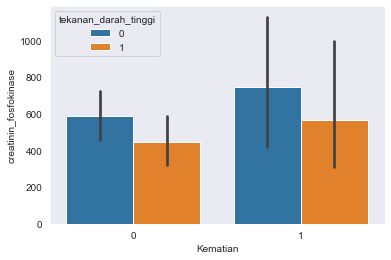

In [28]:
sns.barplot(data_group['Kematian'], data_group['creatinin_fosfokinase'],hue=data_group['tekanan_darah_tinggi'])

#Save Plot 
plt.savefig("visualisasi_creatinin fosfokinase1_barplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


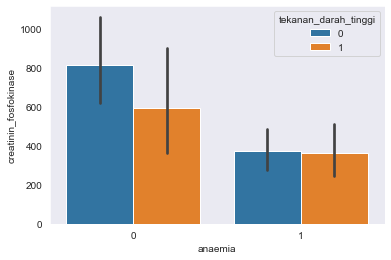

In [29]:
sns.barplot(data_group['anaemia'], data_group['creatinin_fosfokinase'],hue=data_group['tekanan_darah_tinggi'])

#Save Plot 
plt.savefig("visualisasi_creatinin fosfokinase2_barplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan**: 
- Berdasarkan hasil plot grafik bar plot diatas, maka dapat disimpulkan bahwa seseorang yang menderita tekanan darah tinggi dan anemia memiliki creatinin fosfokinase yang rendah. Pasien yang menderita penyakit gagal ginjal memiliki enzim creatinin fosfokinase yang rendah. Sehingga sangat penting apabila memiliki enzim creatinin fosfokinase. 

### Visualisasi atribut smoking pada bar plot

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


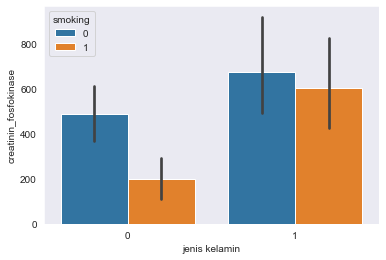

In [30]:
sns.barplot(data_group['jenis kelamin'], data_group['creatinin_fosfokinase'],hue=data_group['smoking'])

#Save Plot 
plt.savefig("visualisasi_creatinin smoking_barplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:**
Berdasarkan hasil bar plot diatas maka dapat ditarik kesimpulan sebagai berikut: 
- Angka kematian untuk perokok laki-laki lebih besar dibanding dengan perokok perempuan. 
- Enzim creatinin fosfokinase lebih banyak di Perempuan

### Visualisasi atribut diabetes, tekanan darah tinggi, dan smoking vs jenis kelamin dengan heat map 

<AxesSubplot:xlabel='jenis kelamin', ylabel='anaemia'>

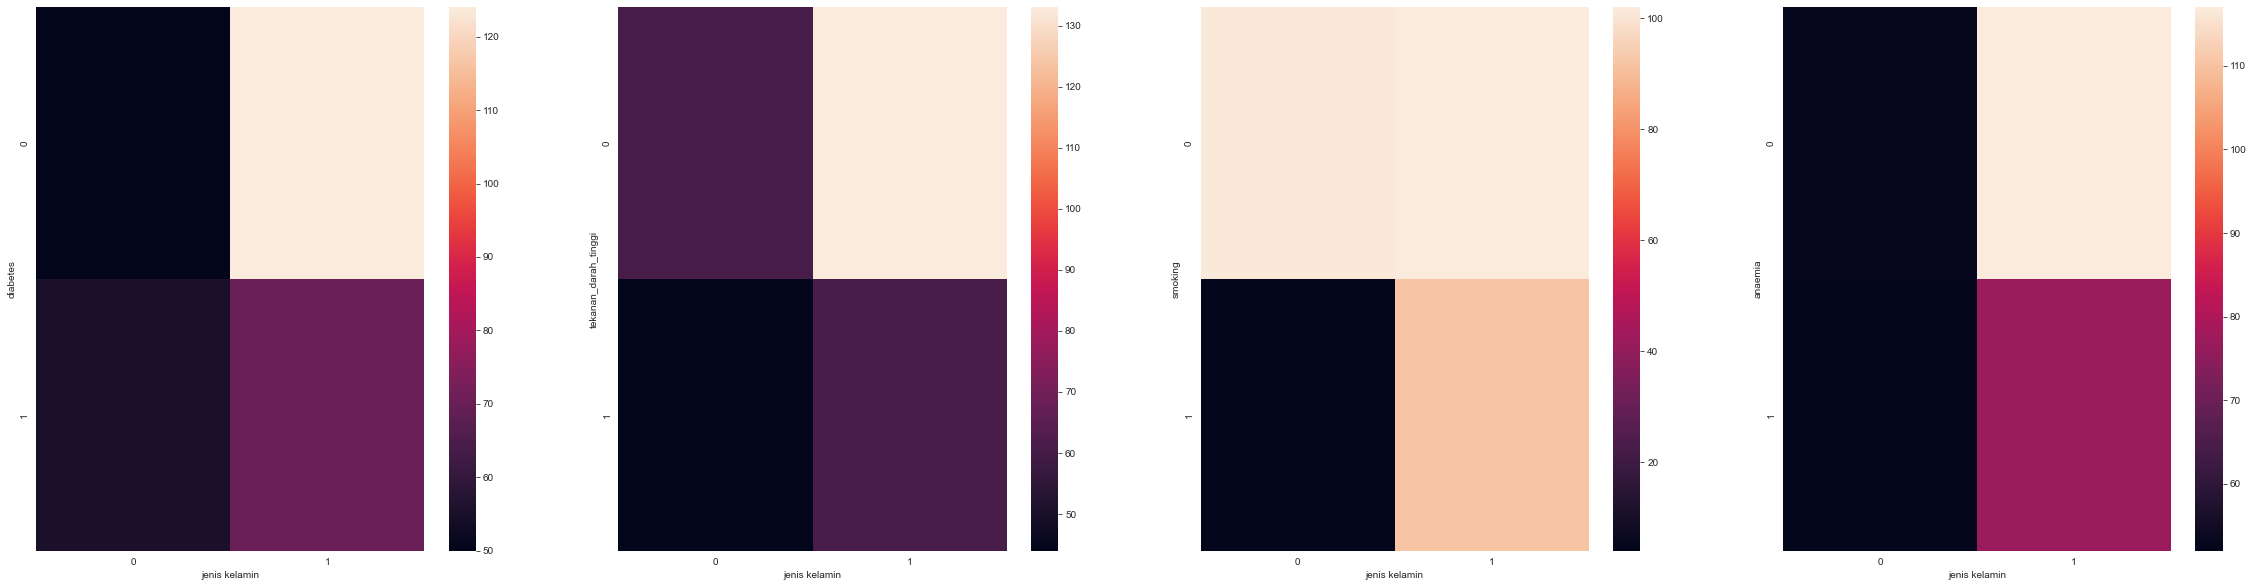

In [31]:
fig = plt.figure(figsize =(40,10))
plt.subplot(1,4,1)
map = pd.crosstab(data_group['diabetes'],data_group['jenis kelamin'])
sns.heatmap(map)


plt.subplot(1,4,2)
map = pd.crosstab(data_group['tekanan_darah_tinggi'],data_group['jenis kelamin'])
sns.heatmap(map)


plt.subplot(1,4,3)
map = pd.crosstab(data_group['smoking'],data_group['jenis kelamin'])
sns.heatmap(map)


plt.subplot(1,4,4)
map = pd.crosstab(data_group['anaemia'],data_group['jenis kelamin'])
sns.heatmap(map)

**Kesimpulan**: 
Berdasarkan plot heatmap pada atribut daibetes, tekanan darah tinggi, smoking, dan anemia dapat ditarik kesimpulan sebagai berikut:
- Laki-laki lebih banyak terkena penyakit diabetes dibanding perempuan 
- Laki-laki lebih banyak terkena penyakit tekanan darah tinggi dibanding perempuan

### Visualisasi Death Event / Kematian berdasarkan usia dengan Seaborn Distplot

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


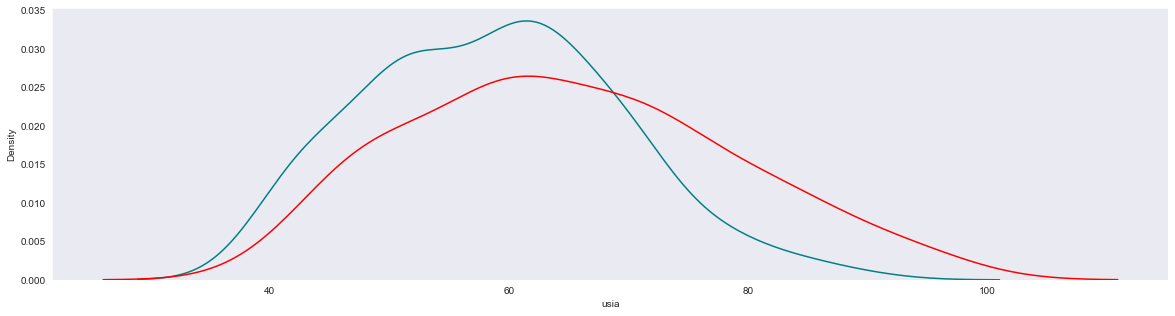

In [32]:
fig = plt.figure(figsize =(20,5))

sns.distplot(data_group[data_group['Kematian'] == 0]['usia'],hist = False,color = 'teal')

sns.distplot(data_group[data_group['Kematian'] == 1]['usia'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian_seaborn_distplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik di atas yang merupakan distplot dapat disimpulkan bahwa: 
- pada garis yang berwarna merah yang mana merepresentasikan kematian, terlihat  bahwa apabila seseorang berusia diatas 60 tahun akan memiliki peluang yang lebih besar menderita penyakit gagal jantung. 

### Visualisasi kematian berdasarkan smoking dengan Seaborn Distplot

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


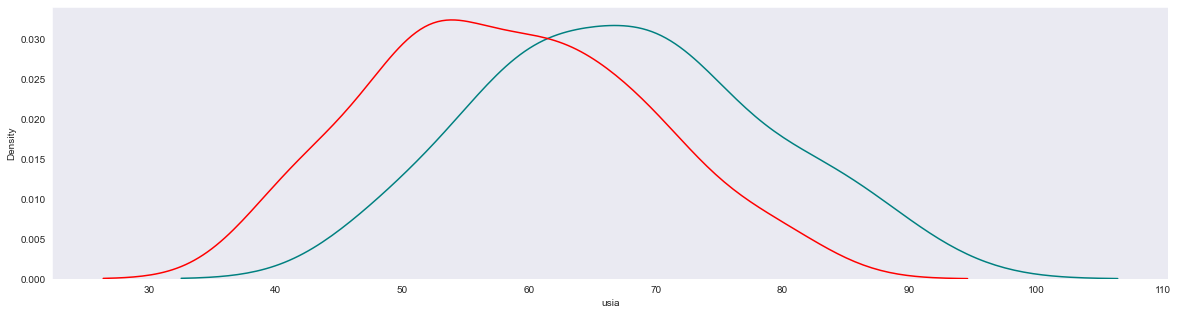

In [33]:
data1 =data_group[data_group['Kematian'] == 1] #apabila Ya
data2 =data_group[data_group['Kematian'] == 0] #apabila Tidak 

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['smoking'] == 1]['usia'],hist = False,color = 'teal')
sns.distplot(data2[data2['smoking'] == 1]['usia'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian vs smooking.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik dengan distplot dapat disimpulkan bahwa:
- Seseorang perokok memiliki kemungkinan menderita gagal jantung lebih tinggi dengan usia yang sama dengan non-perokok 

### Visualisasi Death Event / Kematian berdasarkan diabetes dengan Seaborn Distplot

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


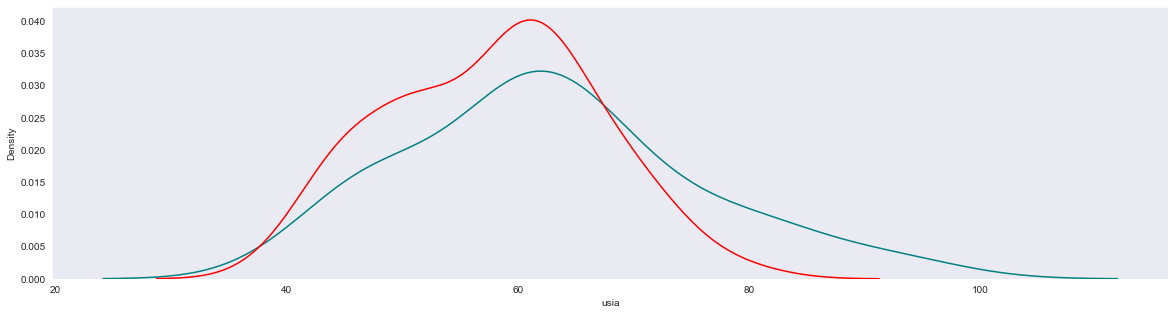

In [34]:
data1 =data_group[data_group['Kematian'] == 1]
data2 =data_group[data_group['Kematian'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['diabetes'] == 1]['usia'],hist = False,color = 'teal')
sns.distplot(data2[data2['diabetes'] == 1]['usia'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian vs diabetes.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik dengan distplot dapat disimpulkan bahwa:
- Seseorang penderita diabetes pada usia yang lebih muda kemungkinan untuk terkenal penyakit gagal jantung akan lebih tinggi. 

# Data Preprocessing

### Feature Engineering

In [35]:
##Mengecek kemungkinan ditemukannya outliers pada parameter platelets
q1 = data_group['platelets'].quantile(0.25)
q3 = data_group['platelets'].quantile(0.75)
iqr = q3 - q1
mini = q1 - 1.5* iqr
maxi = q3 + 1.5*iqr

print('Nilai IQR maksimum data = ', maxi)
print('Nilai IQR minimum data = ', mini)

data_group['platelets'].max(), maxi

Nilai IQR maksimum data =  440000.0
Nilai IQR minimum data =  76000.0


(850000.0, 440000.0)

In [36]:
nilai_maxi = np.max(data_group)
nilai_mini = np.min(data_group)

print('Nilai maksimum data = ', nilai_maxi)
print('Nilai minimum data = ', nilai_mini)

Nilai maksimum data =  usia                         95.0
anaemia                       1.0
creatinin_fosfokinase      7861.0
diabetes                      1.0
fraksi_ejeksi                80.0
tekanan_darah_tinggi          1.0
platelets                850000.0
kreatinin_serum               9.4
sodium_serum                148.0
jenis kelamin                 1.0
smoking                       1.0
time                        285.0
Kematian                      1.0
dtype: float64
Nilai minimum data =  usia                        40.0
anaemia                      0.0
creatinin_fosfokinase       23.0
diabetes                     0.0
fraksi_ejeksi               14.0
tekanan_darah_tinggi         0.0
platelets                25100.0
kreatinin_serum              0.5
sodium_serum               113.0
jenis kelamin                0.0
smoking                      0.0
time                         4.0
Kematian                     0.0
dtype: float64


C:\Users\eliza\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\eliza\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


### Menghapus Outlier

In [37]:
##Menghandle outlier dengan metode iqr 
outliers = ['creatinin_fosfokinase','fraksi_ejeksi','platelets','kreatinin_serum','sodium_serum']

dc1 = data_group.copy()
for i in outliers:
    q1 = data_group[i].quantile(0.25)
    q3 = data_group[i].quantile(0.75)
    
    iqr  = q3 - q1
    mini = q1 - 1.5* iqr
    maxi = q3 + 1.5*iqr
    

    dc1[i] = np.where(
    dc1[i] > maxi,
    maxi,
    np.where(
        dc1[i] < mini,
        mini,
        dc1[i]
        )
    )

C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eliza\anaconda3\lib\si

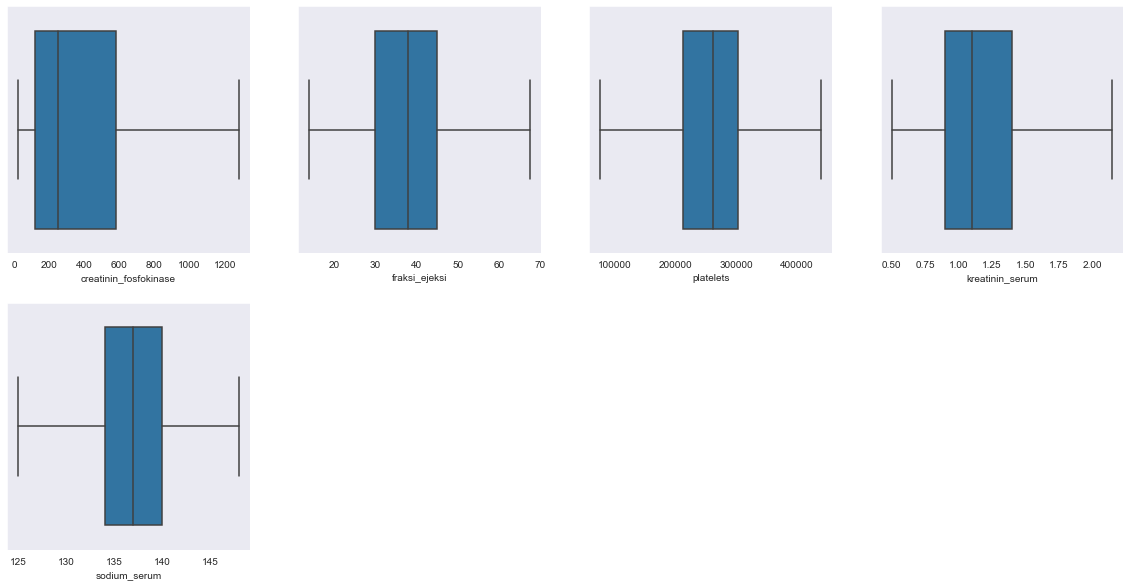

In [38]:
fig = plt.figure(figsize=(20,10))
j=1
for i in outliers:
    plt.subplot(2,4,j)
    sns.boxplot(dc1[i])
    j=j+1

**Kesimpulan:**
- Berdasarkan hasil plot dengan boxplot pada atribut **creatinin fosfokinase, serum sodium, fraksi ejeksi, paltelets, kreatinin serum, dan sodium serum** setelah dilakukan handling outlier, terlihat bahwa sudah **tidak terdapat outlier pada atribut tersebut**. 

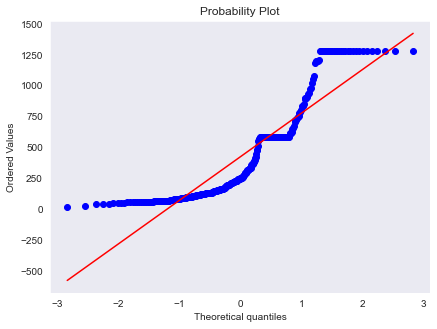

In [39]:
## Ploting Quantile-Quantile Plot (QQ Plot) untuk atribut creatinin fosfokinase
X = dc1['creatinin_fosfokinase']
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
stats.probplot(dc1['creatinin_fosfokinase'], dist ="norm", plot = plt)
plt.show()


In [40]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X)

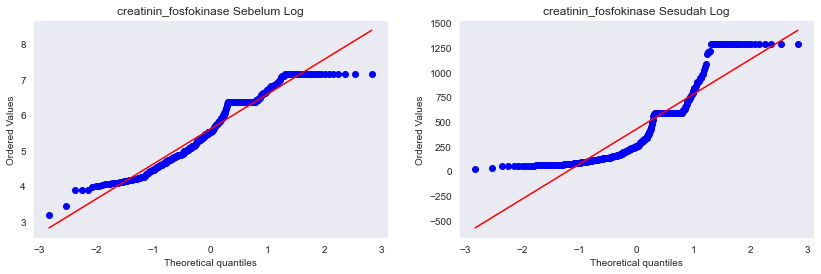

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train_transformed, dist="norm", plot=plt)
plt.title('creatinin_fosfokinase Sebelum Log')

plt.subplot(122)
stats.probplot(X, dist="norm", plot=plt)
plt.title('creatinin_fosfokinase Sesudah Log')

plt.show()

**Kesimpulan**
- Berdasarkan perbandingan grafik dari atribut creatinin fosfokinase sebelum log dan sesudah log dapat disimpulkan bahwa **terdapat peningkatan/ improvement pada QQ plot di atribut creatinin_fosfokinase**

### Scalling dan Splitting Data 

#### Splitting Data

In [42]:
X = data_group.drop('Kematian', axis=1)
y = data_group['Kematian']
print(X.shape)
print(y.shape)

(299, 12)
(299,)


In [43]:
##Membagi data training dan testing dengan proporsi masing-masing 0.7 dan 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=325)

#### Scalling Data 

In [45]:
scaler = StandardScaler()
a = [i for i in data_group.columns if i != 'Kematian']
data_group[a] = scaler.fit_transform(data_group[a])
data_group.head()

,usia,anaemia,creatinin_fosfokinase,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,kreatinin_serum,sodium_serum,jenis kelamin,smoking,time,Kematian
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1



# Model Definition 

Metode pengujian untuk project ini menggunakan model logistic regression, dengan pembanding yaitu:

- Random Forest Classifier 
- Decision Tree
- KNN Classifier 

untuk mengukur kinerja model regresi pada project ini menggunakan metrik R-squares untuk menemukan model terbaik.

In [46]:
##Membuat model pengujian logistic regression
model_1 =LogisticRegression()

##Membuat model pengujian random forest 
model_2 = RandomForestClassifier(n_estimators = 60, random_state = 15)

##Membuat model pengujian decision tree
model_3 = DecisionTreeClassifier()

##Membuat model pengujian KNN Classifier 
model_4 = KNeighborsClassifier(n_neighbors=16)

### Logistic Regression 

In [47]:
lr = LogisticRegression()
model_1.fit(X_train, y_train)
y_pred1 = model_1.predict(X_test)

accuracy_score(y_test,y_pred1)
print('accuracy score logistic regression adalah', accuracy_score(y_test,y_pred1) )

# evaluasi model
confusion_matrix(y_test,y_pred1)

print(classification_report(y_test,y_pred1))

#Ringkasan Evaluasi Model Logistic Regression Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Logistic Regression Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred1),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred1),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred1),4),normal)
print("=============================================================")

accuracy score logistic regression adalah 0.7888888888888889
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        62
           1       0.70      0.57      0.63        28

    accuracy                           0.79        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.78      0.79      0.78        90

 Ringkasan Evaluasi Model Logistic Regression Classifier 
Akurasi :  0.7889 
Presisi :  0.6957 
Recall :  0.5714 
F1 Score :  0.6275 


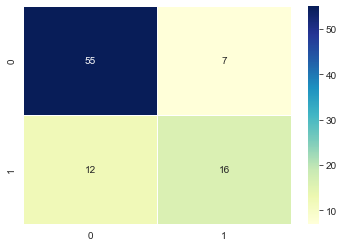

In [48]:
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("Logistic Regression.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### Random Forest Classifier 

In [49]:
model_2.fit(X_train, y_train)

y_pred2 = model_2.predict(X_test)

accuracy_score(y_test,y_pred2)
print('accuracy score random forest classifier adalah', accuracy_score(y_test,y_pred2) )

# evaluasi model
confusion_matrix(y_test,y_pred2)

print(classification_report(y_test,y_pred2))

#Ringkasan Evaluasi Model Random Forest Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Random Forest Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred2),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred2),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred2),4),normal)
print("=============================================================")

accuracy score random forest classifier adalah 0.8
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        62
           1       0.73      0.57      0.64        28

    accuracy                           0.80        90
   macro avg       0.78      0.74      0.75        90
weighted avg       0.79      0.80      0.79        90

 Ringkasan Evaluasi Model Random Forest Classifier 
Akurasi :  0.8 
Presisi :  0.7273 
Recall :  0.5714 
F1 Score :  0.64 


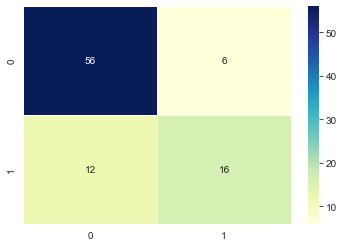

In [50]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("randomforest.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### Decision Tree Classifier 

In [51]:
model_3.fit(X_train,y_train)
y_pred3 = model_3.predict(X_test)

accuracy_score(y_test,y_pred3)
print('accuracy score decision tress classifier adalah', accuracy_score(y_test,y_pred3) )

# evaluasi model
confusion_matrix(y_test,y_pred3)

print(classification_report(y_test,y_pred3))

#Ringkasan Evaluasi Model Decision Tree Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model Decision Tree Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred3),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred3),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred3),4),normal)
print("=============================================================")

accuracy score decision tress classifier adalah 0.7555555555555555
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        62
           1       0.62      0.57      0.59        28

    accuracy                           0.76        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.75      0.76      0.75        90

 Ringkasan Evaluasi Model Decision Tree Classifier 
Akurasi :  0.7556 
Presisi :  0.6154 
Recall :  0.5714 
F1 Score :  0.5926 


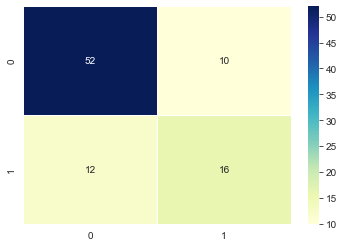

In [52]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("Decision Tree.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### KNN Classifier 

In [53]:
model_4.fit(X_train,y_train)
y_pred4 = model_4.predict(X_test)

accuracy_score(y_test,y_pred4)
print('accuracy score KNN classifier adalah', accuracy_score(y_test,y_pred4) )

# evaluasi model
confusion_matrix(y_test,y_pred4)

print(classification_report(y_test,y_pred4))

#Ringkasan Evaluasi Model Decision Tree Classifier
print("=============================================================")
print(bold,'Ringkasan Evaluasi Model KNN Classifier',normal)
print("=============================================================")
print('Akurasi :', bold,round(accuracy_score(y_test, y_pred4),4),normal)
print('Presisi :', bold,round(precision_score(y_test,y_pred4),4),normal)
print('Recall :', bold,round(recall_score(y_test,y_pred4),4),normal)
print('F1 Score :', bold,round(f1_score(y_test,y_pred4),4),normal)
print("=============================================================")

accuracy score KNN classifier adalah 0.6666666666666666
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        62
           1       0.00      0.00      0.00        28

    accuracy                           0.67        90
   macro avg       0.34      0.48      0.40        90
weighted avg       0.47      0.67      0.55        90

 Ringkasan Evaluasi Model KNN Classifier 
Akurasi :  0.6667 
Presisi :  0.0 
Recall :  0.0 
F1 Score :  0.0 


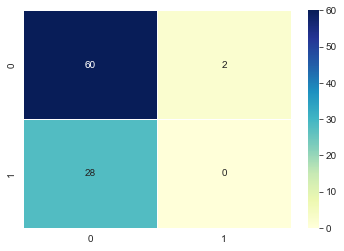

In [54]:
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu',)

# Save Plot
plt.savefig("KNN.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [55]:
print('Akurasi Logistic Regression :', bold,round(accuracy_score(y_test, y_pred1),4),normal)
print('Akurasi Random Forest Classifier:', bold,round(accuracy_score(y_test, y_pred2),4),normal)
print('Akurasi Decision Tree Classifier:', bold,round(accuracy_score(y_test, y_pred3),4),normal)
print('Akurasi KNN Classifier:', bold,round(accuracy_score(y_test, y_pred4),4),normal)



Akurasi Logistic Regression :  0.7889 
Akurasi Random Forest Classifier:  0.8 
Akurasi Decision Tree Classifier:  0.7556 
Akurasi KNN Classifier:  0.6667 


### Convert to Pickle - Random Forest 

In [56]:
pickle.dump(model_1,open('model_LR.pkl','wb'))
pickle.dump(model_2,open('model_RF.pkl','wb'))
pickle.dump(model_3,open('model_DTR.pkl','wb'))
pickle.dump(model_4,open('model_KNN.pkl','wb'))

# Kesimpulan

Berdasarkan analisis yang telah dilakukan, maka dapat diambil kesimpulan sebagai berikut.
1. Persentase angka kematian yang disebabkan karena penyakit gagal jantung ialah sebesar **67.89%** yang mana pasien yang meninggal dunia didominasi oleh pasien berjenis kelamin laki-laki. 
2. Pada dataset ini dilakukan evaluasi model dengan 4 jenis model antara lain seperti: **Logistic regression, random forest classifier, decision tree classifier, dan KNN classfier**. Dari ke-4 model ini didapatkan nilai akurasi masing-masing model sebagai berikut. 
    - Akurasi Logistic Regression :  78.89% 
    - Akurasi Random Forest Classifier:  80% 
    - Akurasi Decision Tree Classifier:  78.89% 
    - Akurasi KNN Classifier:  66.7%       
3.  Model **Random Forest Classifier memiliki nilai akurasi tertinggi** untuk dataset ini, yaitu sebesar **80%** sehingga model ini dipilih sebagai model yang paling tepat untuk memprediksi keselamatan pasien penderita penyakit gagal jantung. 
        
